# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [2]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory landmark_images


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [1]:
!pytest -vv src/transfer.py

/bin/sh: 1: pytest: not found


In [7]:
!python -m pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 5.19s ===============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [8]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

In [9]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning("resnet18", num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=False
)

Froze 62 groups of parameters
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.80it/s]


Epoch: 1 	Training Loss: 3.383937 	Validation Loss: 2.617461
New minimum validation loss: 2.617461. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]


Epoch: 2 	Training Loss: 2.381628 	Validation Loss: 2.002030
New minimum validation loss: 2.002030. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]


Epoch: 3 	Training Loss: 1.947753 	Validation Loss: 1.711975
New minimum validation loss: 1.711975. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]


Epoch: 4 	Training Loss: 1.707493 	Validation Loss: 1.575494
New minimum validation loss: 1.575494. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]


Epoch: 5 	Training Loss: 1.582219 	Validation Loss: 1.469789
New minimum validation loss: 1.469789. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]


Epoch: 6 	Training Loss: 1.469803 	Validation Loss: 1.413421
New minimum validation loss: 1.413421. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.77it/s]


Epoch: 7 	Training Loss: 1.385191 	Validation Loss: 1.371532
New minimum validation loss: 1.371532. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]


Epoch: 8 	Training Loss: 1.322048 	Validation Loss: 1.312163
New minimum validation loss: 1.312163. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]


Epoch: 9 	Training Loss: 1.302844 	Validation Loss: 1.283512
New minimum validation loss: 1.283512. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.80it/s]

Epoch: 10 	Training Loss: 1.233848 	Validation Loss: 1.279620



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.78it/s]


Epoch: 11 	Training Loss: 1.185275 	Validation Loss: 1.250080
New minimum validation loss: 1.250080. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.76it/s]

Epoch: 12 	Training Loss: 1.170695 	Validation Loss: 1.246534



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.76it/s]


Epoch: 13 	Training Loss: 1.149595 	Validation Loss: 1.228183
New minimum validation loss: 1.228183. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.83it/s]


Epoch: 14 	Training Loss: 1.102232 	Validation Loss: 1.203716
New minimum validation loss: 1.203716. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]

Epoch: 15 	Training Loss: 1.083137 	Validation Loss: 1.195836



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.83it/s]


Epoch: 16 	Training Loss: 1.062388 	Validation Loss: 1.182615
New minimum validation loss: 1.182615. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.80it/s]

Epoch: 17 	Training Loss: 1.049379 	Validation Loss: 1.193695



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.78it/s]


Epoch: 18 	Training Loss: 1.031842 	Validation Loss: 1.168739
New minimum validation loss: 1.168739. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.80it/s]

Epoch: 19 	Training Loss: 1.001835 	Validation Loss: 1.184930



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.78it/s]

Epoch: 20 	Training Loss: 0.989608 	Validation Loss: 1.164620



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]


Epoch: 21 	Training Loss: 0.981365 	Validation Loss: 1.154071
New minimum validation loss: 1.154071. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 22 	Training Loss: 0.973936 	Validation Loss: 1.160856



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]

Epoch: 23 	Training Loss: 0.959365 	Validation Loss: 1.179285



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.75it/s]


Epoch: 24 	Training Loss: 0.944281 	Validation Loss: 1.139346
New minimum validation loss: 1.139346. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.77it/s]

Epoch: 25 	Training Loss: 0.945419 	Validation Loss: 1.167067



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 26 	Training Loss: 0.918578 	Validation Loss: 1.172982



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]

Epoch: 27 	Training Loss: 0.901565 	Validation Loss: 1.165436



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]

Epoch: 28 	Training Loss: 0.929328 	Validation Loss: 1.149239



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.77it/s]

Epoch: 29 	Training Loss: 0.905130 	Validation Loss: 1.173362



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]

Epoch: 30 	Training Loss: 0.921266 	Validation Loss: 1.166790



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 31 	Training Loss: 0.873581 	Validation Loss: 1.164828



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]

Epoch: 32 	Training Loss: 0.882306 	Validation Loss: 1.162914



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]

Epoch: 33 	Training Loss: 0.864794 	Validation Loss: 1.164230



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]

Epoch: 34 	Training Loss: 0.852163 	Validation Loss: 1.157149



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.78it/s]

Epoch: 35 	Training Loss: 0.871236 	Validation Loss: 1.183223
Epoch 00035: reducing learning rate of group 0 to 1.0000e-04.



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]

Epoch: 36 	Training Loss: 0.805884 	Validation Loss: 1.139669



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.77it/s]

Epoch: 37 	Training Loss: 0.809151 	Validation Loss: 1.143466



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.76it/s]

Epoch: 38 	Training Loss: 0.797806 	Validation Loss: 1.152648



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]

Epoch: 39 	Training Loss: 0.783582 	Validation Loss: 1.137974



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.80it/s]

Epoch: 40 	Training Loss: 0.784601 	Validation Loss: 1.147548



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.76it/s]

Epoch: 41 	Training Loss: 0.782312 	Validation Loss: 1.140842



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]

Epoch: 42 	Training Loss: 0.808832 	Validation Loss: 1.138489



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]

Epoch: 43 	Training Loss: 0.785302 	Validation Loss: 1.152075



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]

Epoch: 44 	Training Loss: 0.806344 	Validation Loss: 1.141250



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]

Epoch: 45 	Training Loss: 0.811890 	Validation Loss: 1.132264



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.77it/s]

Epoch: 46 	Training Loss: 0.802353 	Validation Loss: 1.135772
Epoch 00046: reducing learning rate of group 0 to 1.0000e-05.



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.78it/s]

Epoch: 47 	Training Loss: 0.795123 	Validation Loss: 1.134281



Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.76it/s]

Epoch: 48 	Training Loss: 0.775027 	Validation Loss: 1.134157



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.80it/s]

Epoch: 49 	Training Loss: 0.785425 	Validation Loss: 1.141912



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]

Epoch: 50 	Training Loss: 0.787807 	Validation Loss: 1.133775


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ We applied a transfer learning approach for Landmark classification. We picked the resnet18 pre-trained model to freeze its backbone and substitute the head and its fully-connected input layers to connect with the landmark architecture head. We trained it for 50 epochs and tested the model, and accuracy improved to 72 % for landmark classification.  ResNet18 is trained on natural scenes, and it’s used for image recognition and classification tasks. In landmark classification, we are classifying famous landmarks of the world. For this reason, it is suitable for the current problem.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [10]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Froze 62 groups of parameters


Testing: 100%|██████████████████████████████████| 20/20 [00:10<00:00,  1.85it/s]

Test Loss: 1.056159


Test Accuracy: 72% (912/1250)


1.0561588555574415

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [11]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


100%|███████████████████████████████████████| 1250/1250 [01:42<00:00, 12.18it/s]


Accuracy: 0.7312


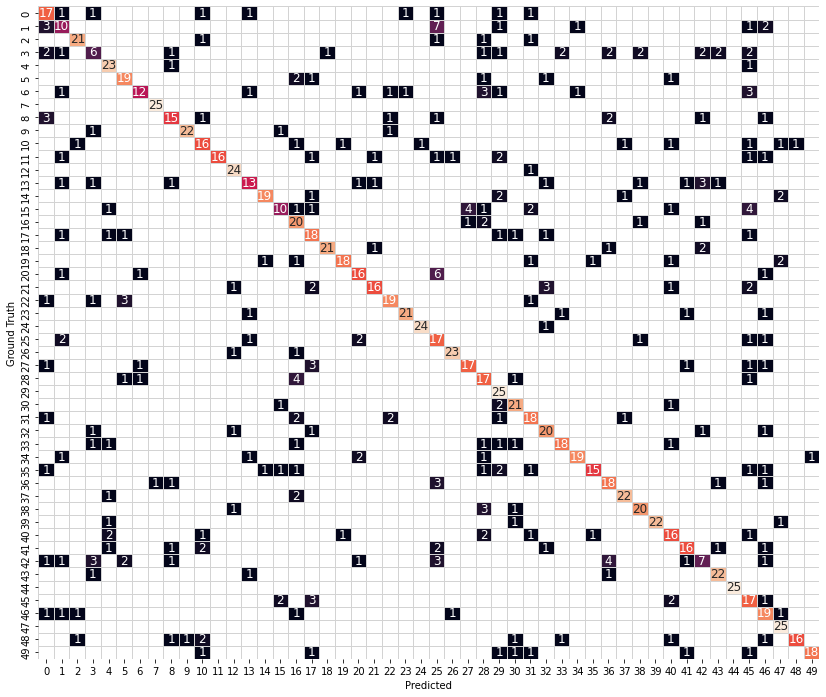

In [12]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)